3. Return Calculation 
   - Simple return
        - Easy to use
        - 직관적이고 일반적임
        - 1 단위의 수익률 계산에는 편리함, 하지만 평균을 비롯한 통계작업에 적합하지 않음
        - 수식 : (End Price/Beginning Price) -1
                 파이썬의 데이타프레임 시계열 데이터에서는 .pct_change() 수식을 쓸 수 있음

   - Log return
        - 계산기의 도움을 받아서 계산해야 함
        - 직관적이지 않음
        - 수익률 간의 덧셈/뺄셈이 가능해서 통계작업이 가능함. 리스크(변동성)을 구할 수 있음
        - 하락이 -100%를 넘길 수 있음. 
        - 수식 : log(last price / first price) or
                 log(last price)-log(first price)


   - CAGR(Compound Annual Growth Rate)
        - CAGR = (Last Price / First Price)^(1/No of Years) - 1
        

In [1]:
#Packages used (사용된 패키지)
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2에서 500 까지 2 단위로 증가하는 리스트를 만들어서 100을 기준으로 상하 수익률을 계산하고자 함

p=[]
for i in range(2,502,2):
    p.append(i)
df=pd.DataFrame(p)    

df

,0
0,2
1,4
2,6
3,8
4,10
...,...
245,492
246,494
247,496
248,498


In [3]:
df=df.rename(columns={0:'Price'})
df['log return']=np.log(df['Price']/100)
df['simple return']=df['Price']/100 -1
df

,Price,log return,simple return
0,2,-3.912023,-0.98
1,4,-3.218876,-0.96
2,6,-2.813411,-0.94
3,8,-2.525729,-0.92
4,10,-2.302585,-0.90
...,...,...,...
245,492,1.593309,3.92
246,494,1.597365,3.94
247,496,1.601406,3.96
248,498,1.605430,3.98


C:\Users\euisu\AppData\Local\Temp\ipykernel_35328\2238455556.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0%}'.format(x) for x in current_values])


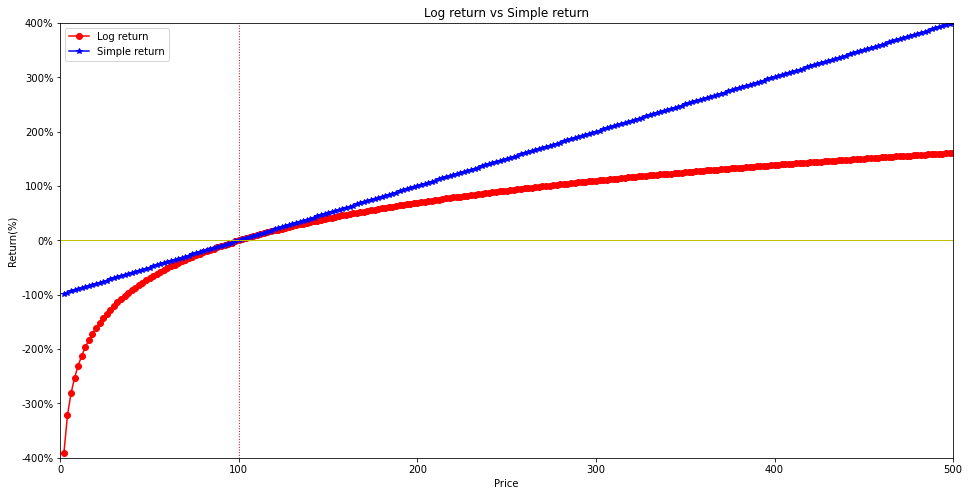

In [4]:
# Line Chart 

x=df['Price']
y1=df['log return']
y2=df['simple return']

plt.figure(figsize=(16,8))
plt.xlabel("Price")
plt.ylabel('Return(%)')
plt.title('Log return vs Simple return')

plt.plot(x,y1, color='red', marker='o', label='Log return')
plt.plot(x,y2, color="blue",marker='*', label = 'Simple return')
plt.legend()
plt.axis([0,500,-4,4])      ## x축은 0~500 까지, y축은 -400%~ 500% 까지 보여줍니다

# Y-axis % 표시
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0%}'.format(x) for x in current_values])

plt.axhline(y=0, color='y', linewidth=1)                    # 가로선
plt.axvline(x=100, color='r', linestyle=':', linewidth=1)   # 세로선

plt.show()

In [5]:
#CAGR calculation function. 
#CAGR=(last price / Initial pirce)^(1/# of years) - 1 

def getCAGR(initial_price, last_price, years):
    CAGR=((last_price/initial_price)**(1/years)-1)
    return CAGR

Ini_p = 65300
last_p = 90000
no_years = 3

cagr=getCAGR(Ini_p,last_p,no_years)
print(cagr)

0.11286660276391958
